<a href="https://colab.research.google.com/github/Sanjay-K-2002/Stock_Prediction/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price                     Adj Close Close High  Low Open Volume company_name  \
Ticker                         AAPL  AAPL AAPL AAPL AAPL   AAPL                
Date                                                                           
2024-10-24 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN         AMZN   
2024-10-25 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN         AMZN   
2024-10-28 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN         AMZN   
2024-10-29 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN         AMZN   
2024-10-30 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN         AMZN   
2024-10-31 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN         AMZN   
2024-11-01 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN         AMZN   
2024-11-04 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN         AMZN   
2024-11-05 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN         AMZN   
2024-11-06 00:00:00+00:00       NaN   Na

TypeError: only length-1 arrays can be converted to Python scalars

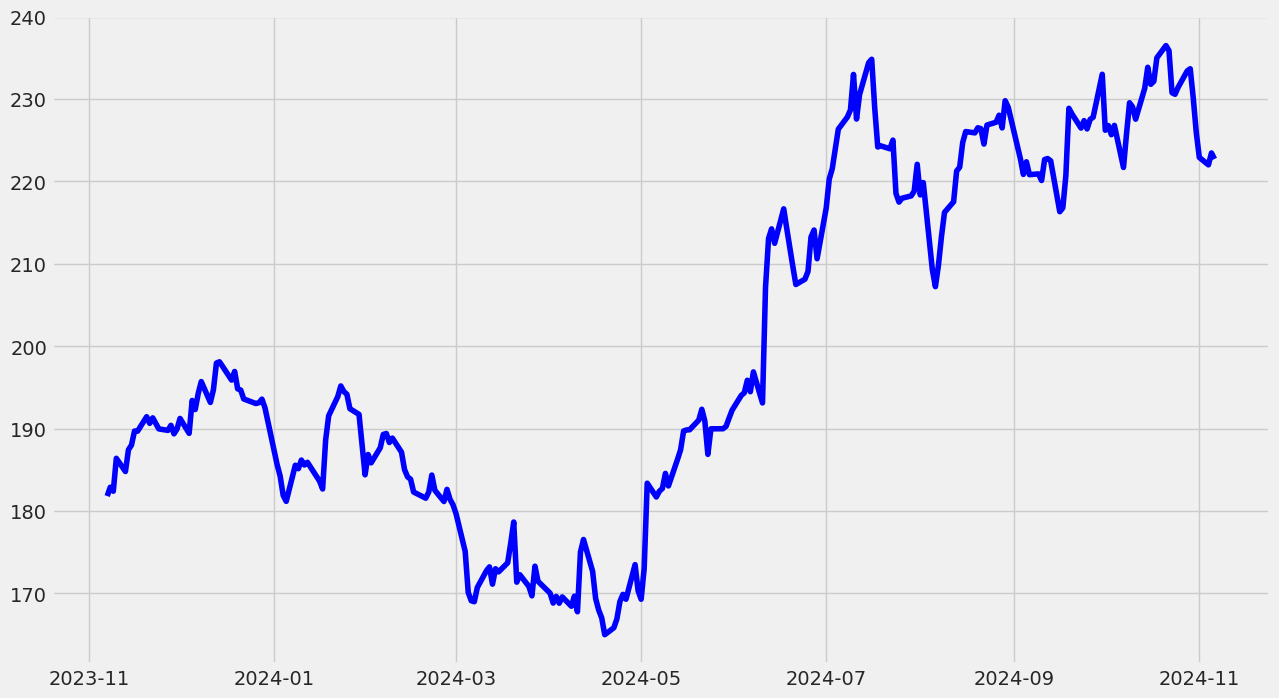

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime

# Set the style for seaborn and matplotlib
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# List of tech stocks for analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up end and start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Create an empty list to store the stock dataframes
company_list = []

for stock in tech_list:
    # Download stock data
    data = yf.download(stock, start=start, end=end)
    data["company_name"] = stock  # Add a column for the stock name
    company_list.append(data)

# Concatenate the dataframes in company_list to create a single DataFrame 'df'
df = pd.concat(company_list, axis=0)

# Display the last 10 rows of the DataFrame
print(df.tail(10))

# Plot closing prices and volumes for each company
for company, com_name in zip(company_list, tech_list):
    plt.figure(figsize=(14, 8))

    # Plot the closing price
    plt.plot(company.index, company['Close'], label=f'{com_name} Close Price', color='blue')

    # Plot the volume in green as a bar plot on the secondary y-axis
    plt.bar(company.index, company['Volume'], label=f'{com_name} Volume', color='green', alpha=0.3)

    # Adding titles and labels
    plt.title(f'{com_name} Stock Price and Volume')
    plt.xlabel('Date')
    plt.ylabel('Close Price in USD ($)')
    plt.legend(loc='upper left')

    plt.show()


[*********************100%%**********************]  1 of 1 completed


SVM RMSE: 36.74991468130437
GBR RMSE: 23.578904820090333


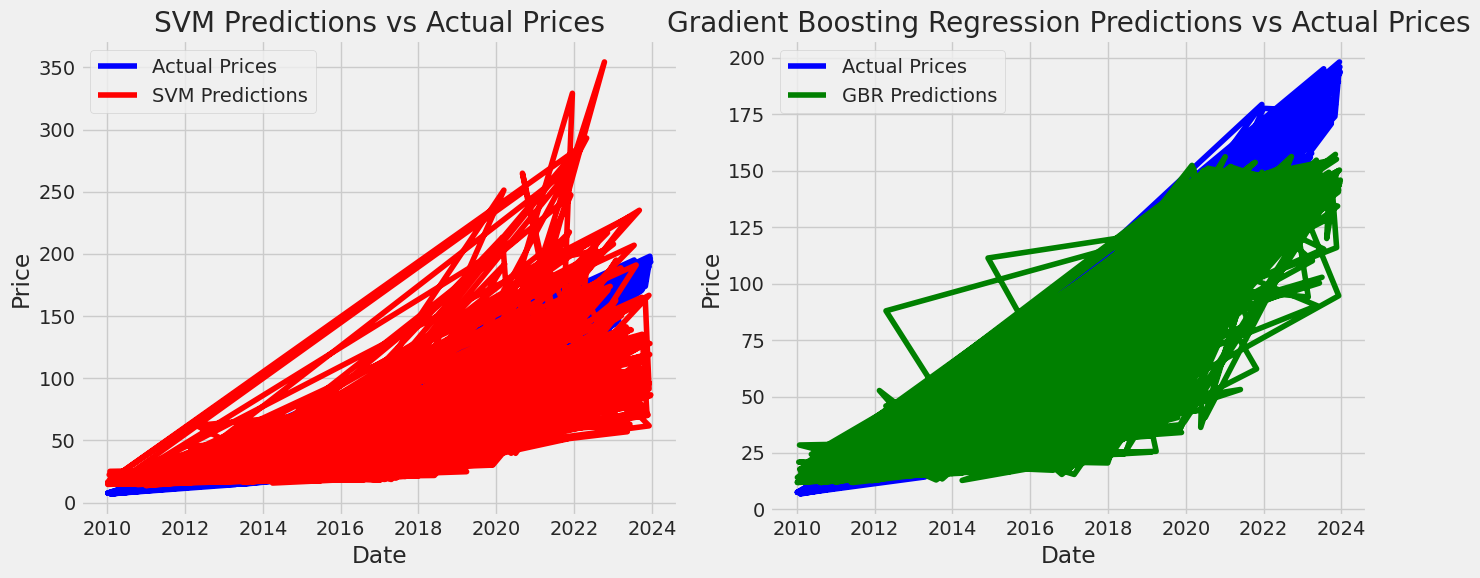

In [ ]:
pip install pandas_datareader

In [ ]:
pip install yfinance

In [ ]:
# General info about the AAPL DataFrame
AAPL.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-11-06 00:00:00+00:00 to 2024-11-01 00:00:00+00:00
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  250 non-null    float64
 1   (Close, AAPL)      250 non-null    float64
 2   (High, AAPL)       250 non-null    float64
 3   (Low, AAPL)        250 non-null    float64
 4   (Open, AAPL)       250 non-null    float64
 5   (Volume, AAPL)     250 non-null    int64  
 6   (company_name, )   250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


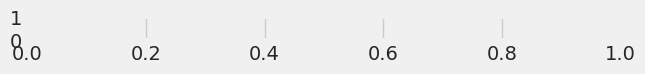

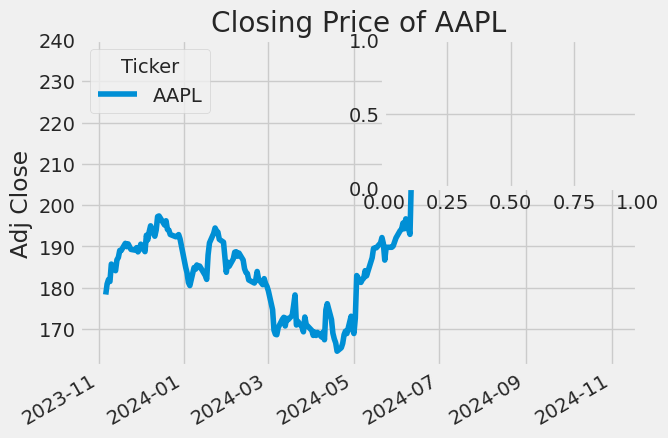

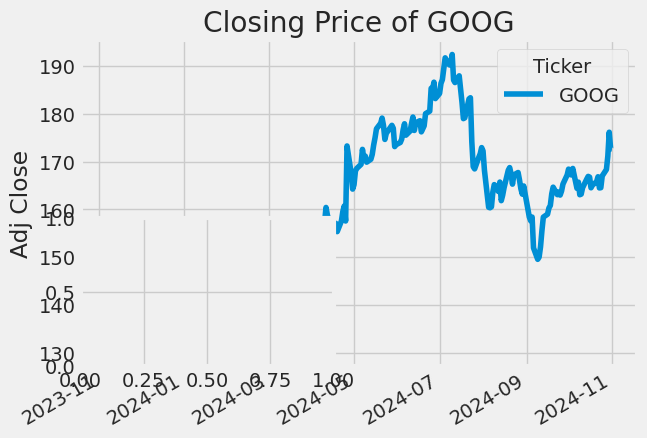

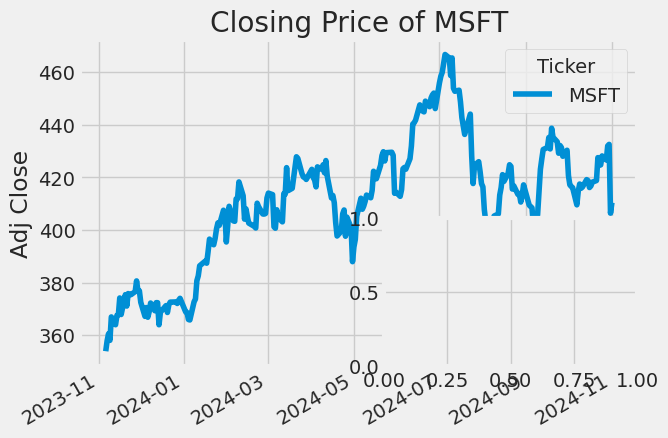

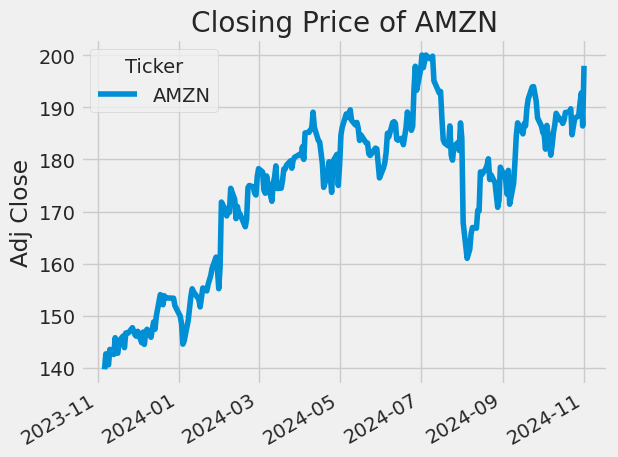

In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel("Adj Close")
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

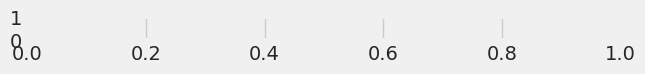

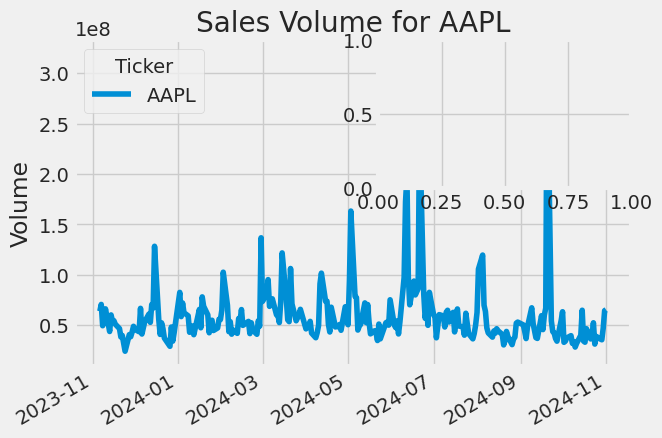

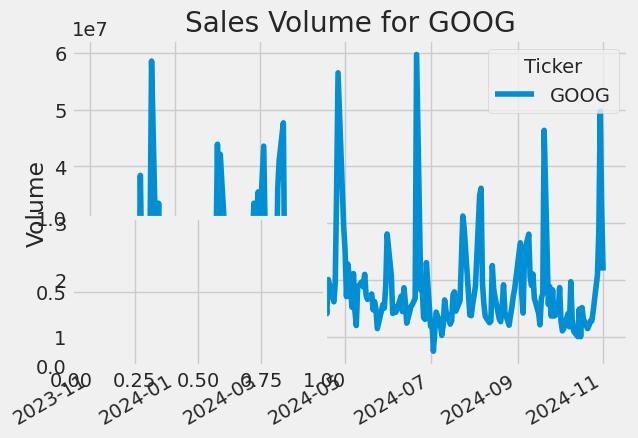

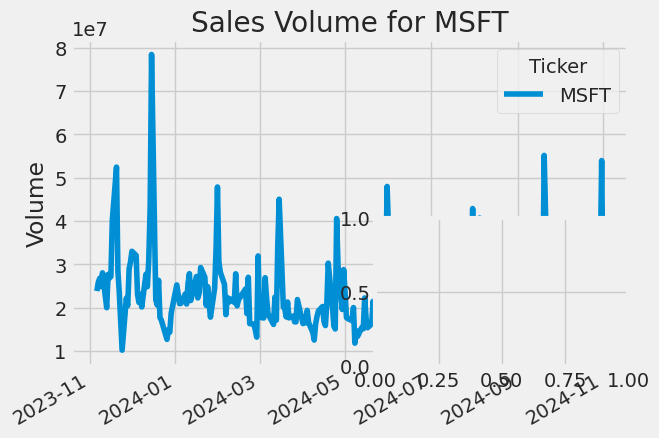

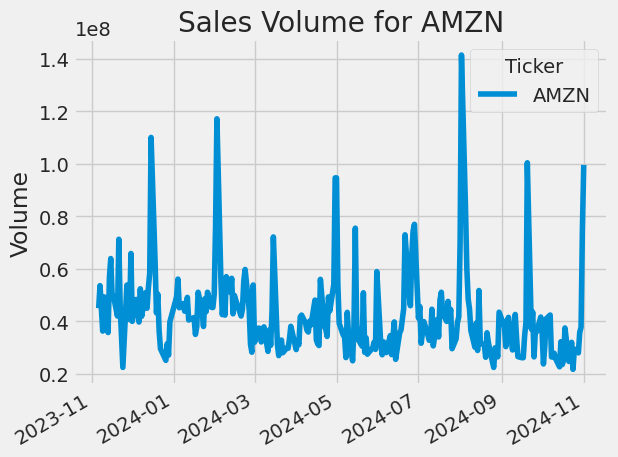

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel("Volume")
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()


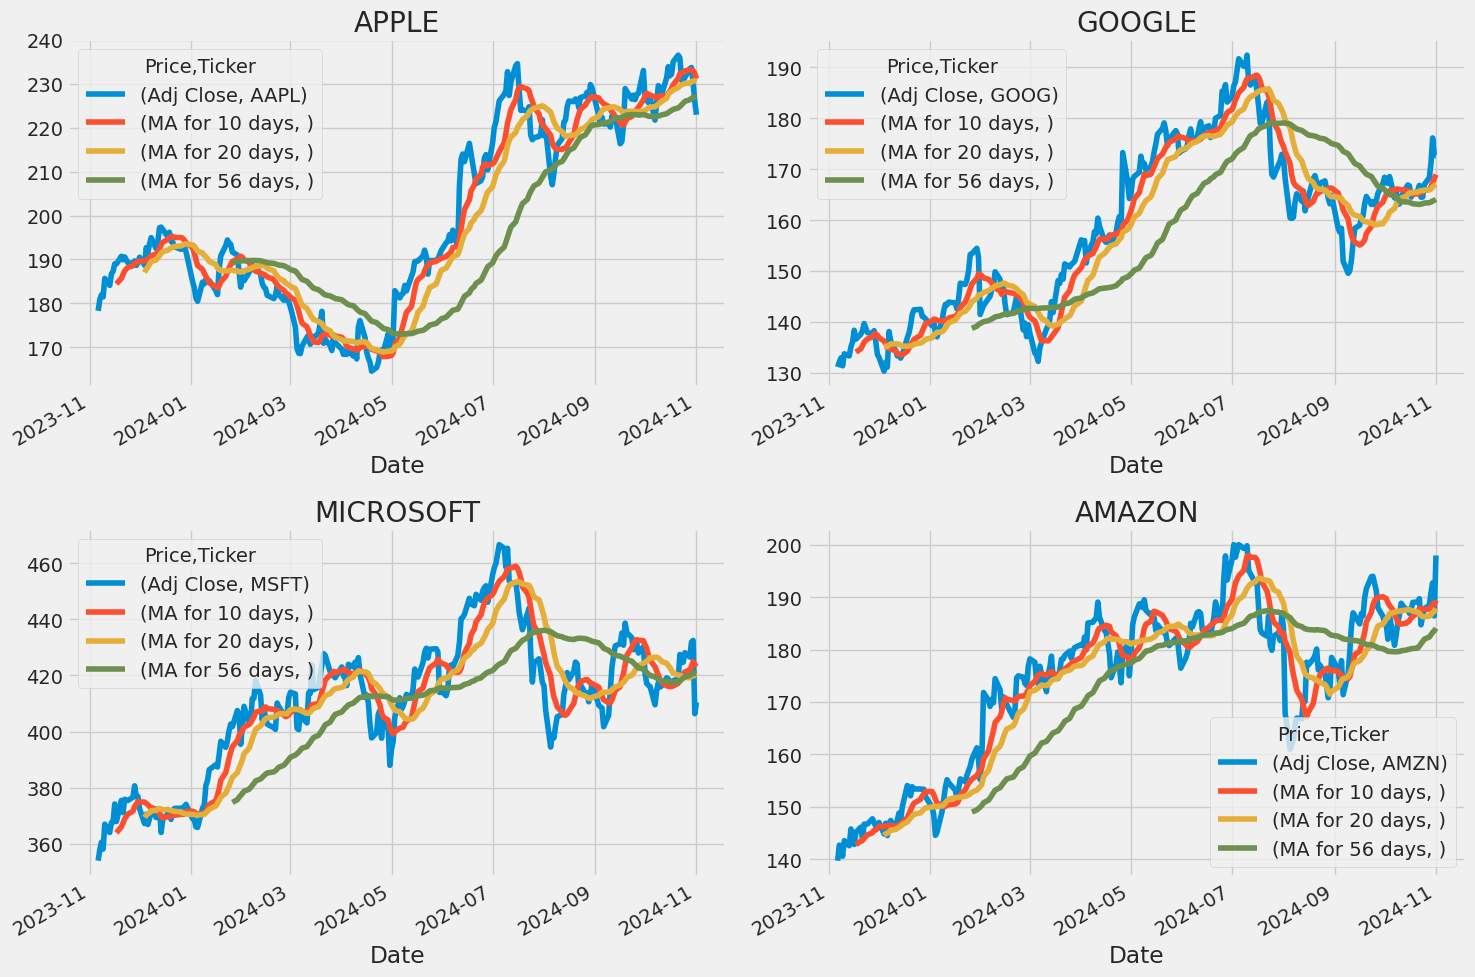

In [ ]:
ma_day = [10, 20, 56]  # Updated with valid moving average day values

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Create a list of valid columns to plot
columns_to_plot = ['Adj Close'] + [f"MA for {ma} days" for ma in ma_day]

AAPL[columns_to_plot].plot(ax=axes[0, 0])
axes[0, 0].set_title('APPLE')

GOOG[columns_to_plot].plot(ax=axes[0, 1])
axes[0, 1].set_title('GOOGLE')

MSFT[columns_to_plot].plot(ax=axes[1, 0])
axes[1, 0].set_title('MICROSOFT')

AMZN[columns_to_plot].plot(ax=axes[1, 1])
axes[1, 1].set_title('AMAZON')

fig.tight_layout()


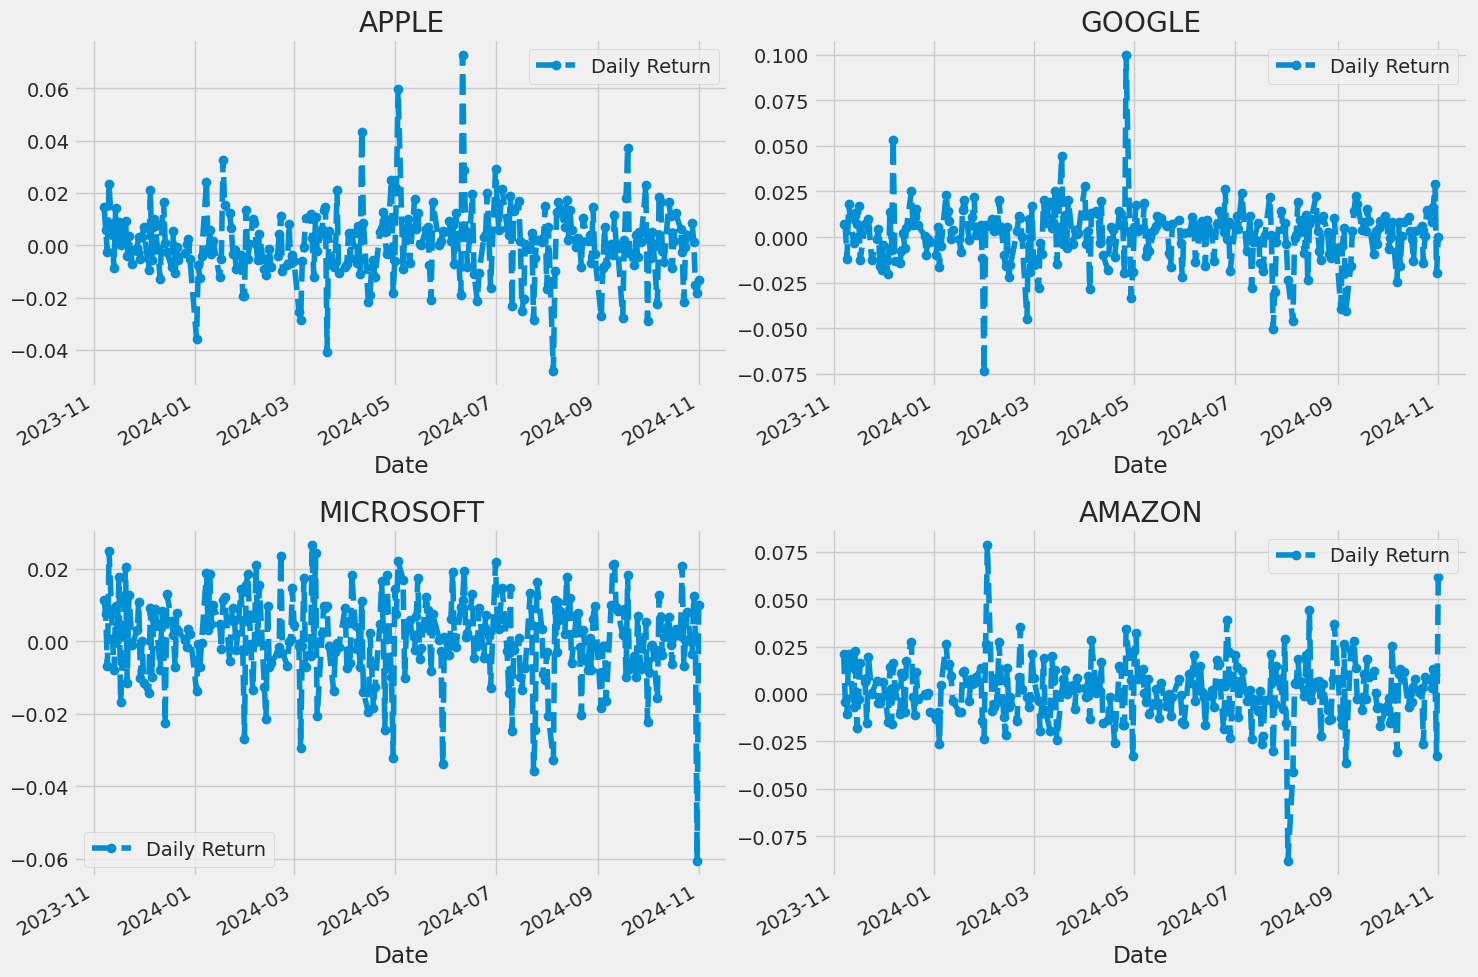

In [ ]:
# Calculate daily returns for each company in company_list
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0, 0], legend=True, linestyle='--', marker='o')
axes[0, 0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0, 1], legend=True, linestyle='--', marker='o')
axes[0, 1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1, 0], legend=True, linestyle='--', marker='o')
axes[1, 0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1, 1], legend=True, linestyle='--', marker='o')
axes[1, 1].set_title('AMAZON')

fig.tight_layout()


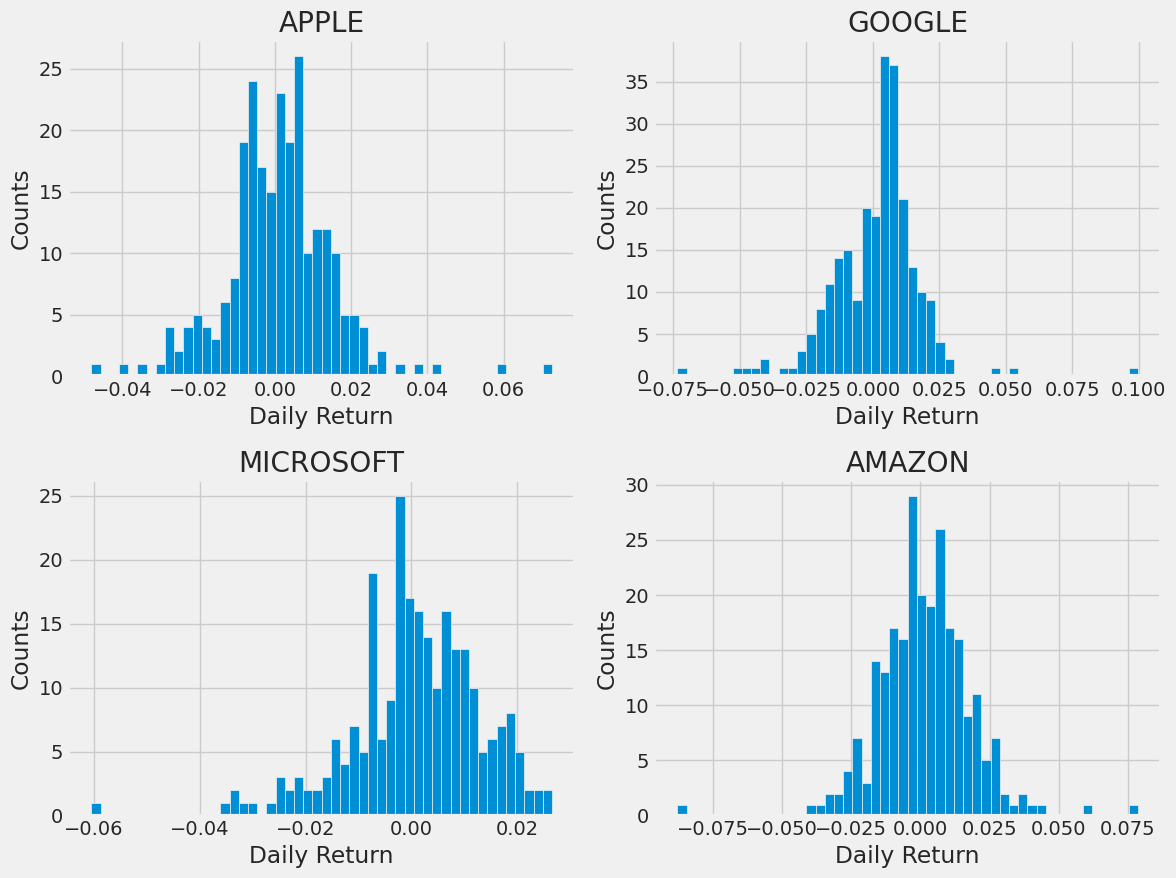

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()


In [ ]:
import pandas as pd
import yfinance as yf
from datetime import datetime

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year -1 , end.month, end.day)

# Create an empty DataFrame to store the adjusted closing prices for all companies
closing_df = pd.DataFrame()

# Iterate through the tech_list and fetch the Adj Close data for each company
for company in tech_list:
    # Download stock data and fetch the 'Adj Close' column
    company_data = yf.download(company, start=start, end=end)['Adj Close']
    closing_df[company] = company_data

# Make a new DataFrame for tech returns
tech_rets = closing_df.pct_change()
tech_rets.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,GOOG,MSFT,AMZN
Date,,,,
2023-11-06 00:00:00+00:00,NaN,NaN,NaN,NaN
2023-11-07 00:00:00+00:00,0.014451,0.007227,0.011219,0.021254
2023-11-08 00:00:00+00:00,0.005885,0.006495,0.007406,-0.004415
2023-11-09 00:00:00+00:00,-0.002625,-0.011781,-0.006911,-0.010417
2023-11-10 00:00:00+00:00,0.023220,0.017997,0.024897,0.021053


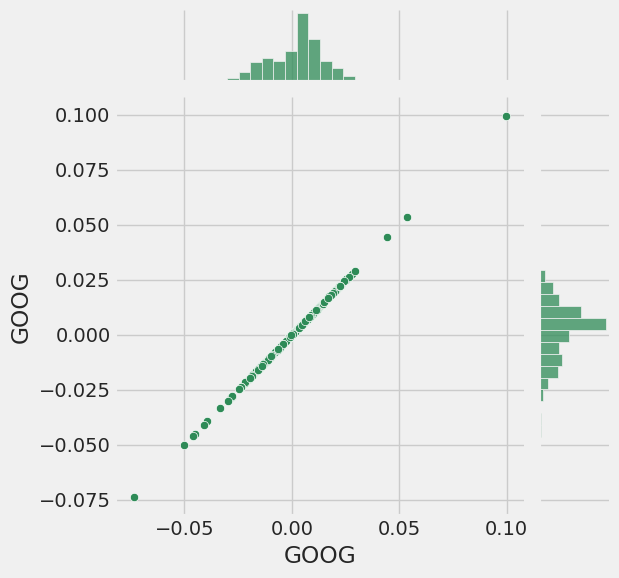

In [ ]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


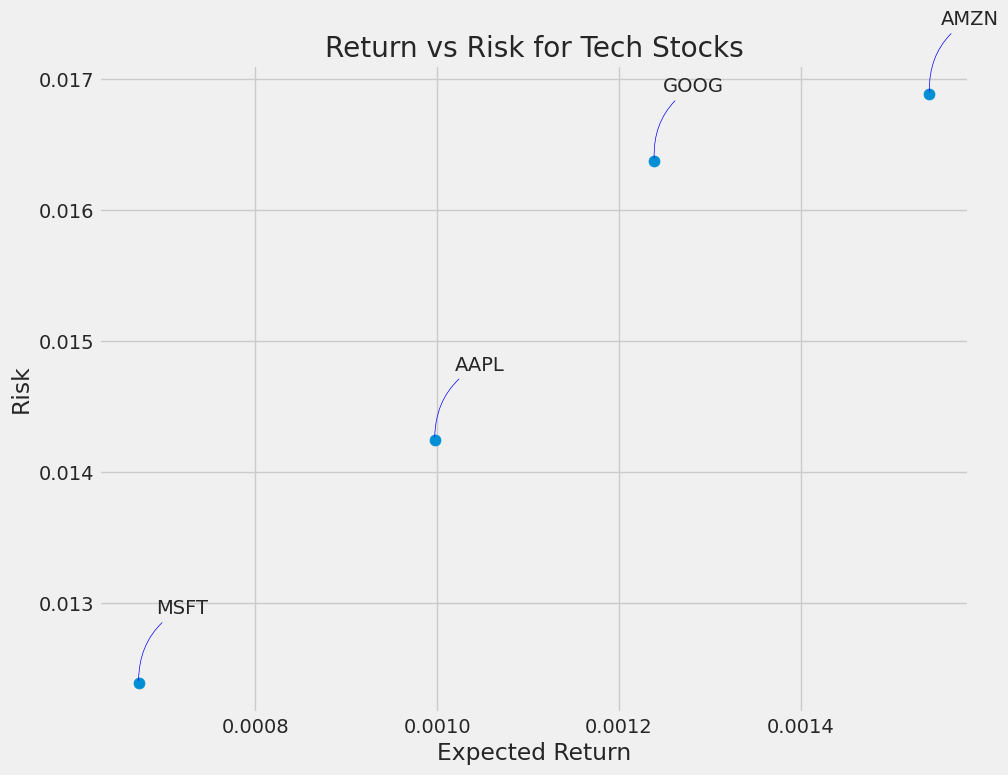

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Create an empty DataFrame to store the adjusted closing prices for all companies
closing_df = pd.DataFrame()

# Iterate through the tech_list and fetch the Adj Close data for each company
for company in tech_list:
    company_data = yf.download(company, start=start, end=end)['Adj Close']
    closing_df[company] = company_data

# Make a new DataFrame for tech returns
tech_rets = closing_df.pct_change()

# Drop rows with NaN values
rets = tech_rets.dropna()

# Calculate the area of the scatter plot markers
area = np.pi * 20

# Create the scatter plot
plt.figure(figsize=(10, 8))  # Adjust the figsize as needed
plt.scatter(rets.mean(), rets.std(), s=area)

# Add labels and title
plt.xlabel('Expected Return')
plt.ylabel('Risk')
plt.title('Return vs Risk for Tech Stocks')

# Annotate each point
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right',
                 arrowprops=dict(arrowstyle="-", color='blue', connectionstyle="arc3,rad=0.3"))

plt.show()


ValueError: Incorrect style argument: 'arc3,rad'

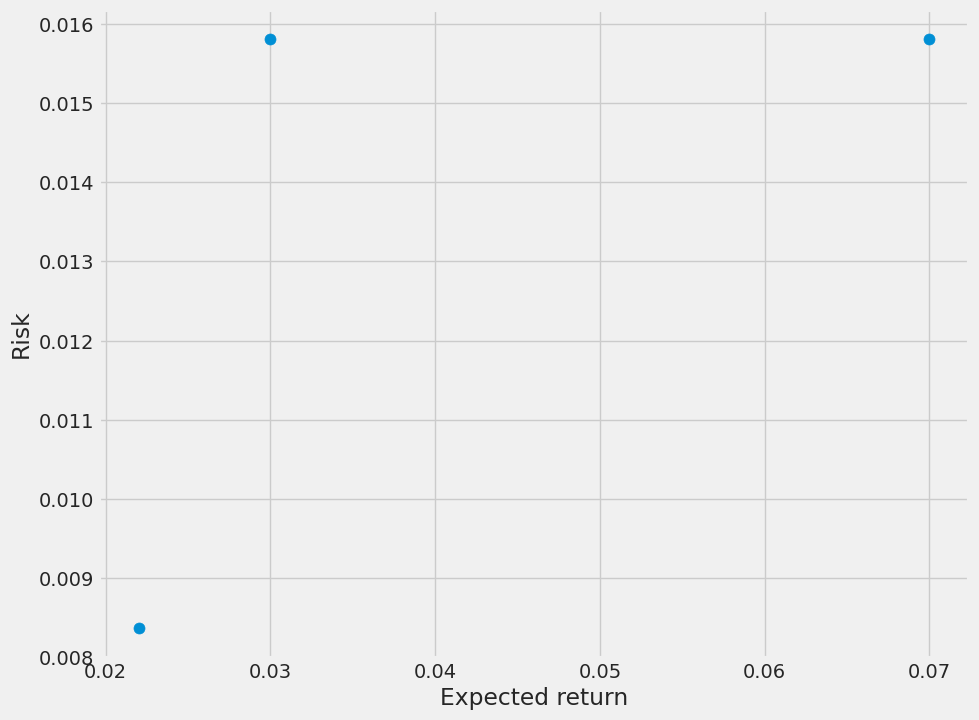

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming tech_rets is a DataFrame
tech_rets = pd.DataFrame({'AAPL': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'GOOGL': [0.03, 0.02, 0.01, 0.02, 0.03],
                          'MSFT': [0.05, 0.06, 0.07, 0.08, 0.09]})

# Rest of your code
rets = tech_rets.dropna()
area = np.pi * 20
plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad'))
plt.show()




In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Define the stock symbol and the date range
symbol = 'AAPL'
start_date = '2012-01-01'
end_date = '2024-11-04'  # Current date in YYYY-MM-DD format

# Download the stock data
df = yf.download(symbol, start=start_date, end=end_date)

# Show the data
print(df.head())


[*********************100%***********************]  1 of 1 completed

Price                      Adj Close      Close       High        Low  \
Ticker                          AAPL       AAPL       AAPL       AAPL   
Date                                                                    
2012-01-03 00:00:00+00:00  12.402625  14.686786  14.732143  14.607143   
2012-01-04 00:00:00+00:00  12.469281  14.765714  14.810000  14.617143   
2012-01-05 00:00:00+00:00  12.607718  14.929643  14.948214  14.738214   
2012-01-06 00:00:00+00:00  12.739510  15.085714  15.098214  14.972143   
2012-01-09 00:00:00+00:00  12.719311  15.061786  15.276786  15.048214   

Price                           Open     Volume  
Ticker                          AAPL       AAPL  
Date                                             
2012-01-03 00:00:00+00:00  14.621429  302220800  
2012-01-04 00:00:00+00:00  14.642857  260022000  
2012-01-05 00:00:00+00:00  14.819643  271269600  
2012-01-06 00:00:00+00:00  14.991786  318292800  
2012-01-09 00:00:00+00:00  15.196429  394024400  


In [ ]:

# Show the valid and predicted prices
valid

,Close,Predictions
2024-03-21,81.773398,84.425366
2024-03-22,18.915747,20.851050
2024-03-23,67.639911,73.400684
2024-03-24,86.322687,89.111101
2024-03-25,46.400384,47.753535
...,...,...
2024-11-26,NaN,NaN
2024-11-27,NaN,NaN
2024-11-28,NaN,NaN
2024-11-29,NaN,NaN


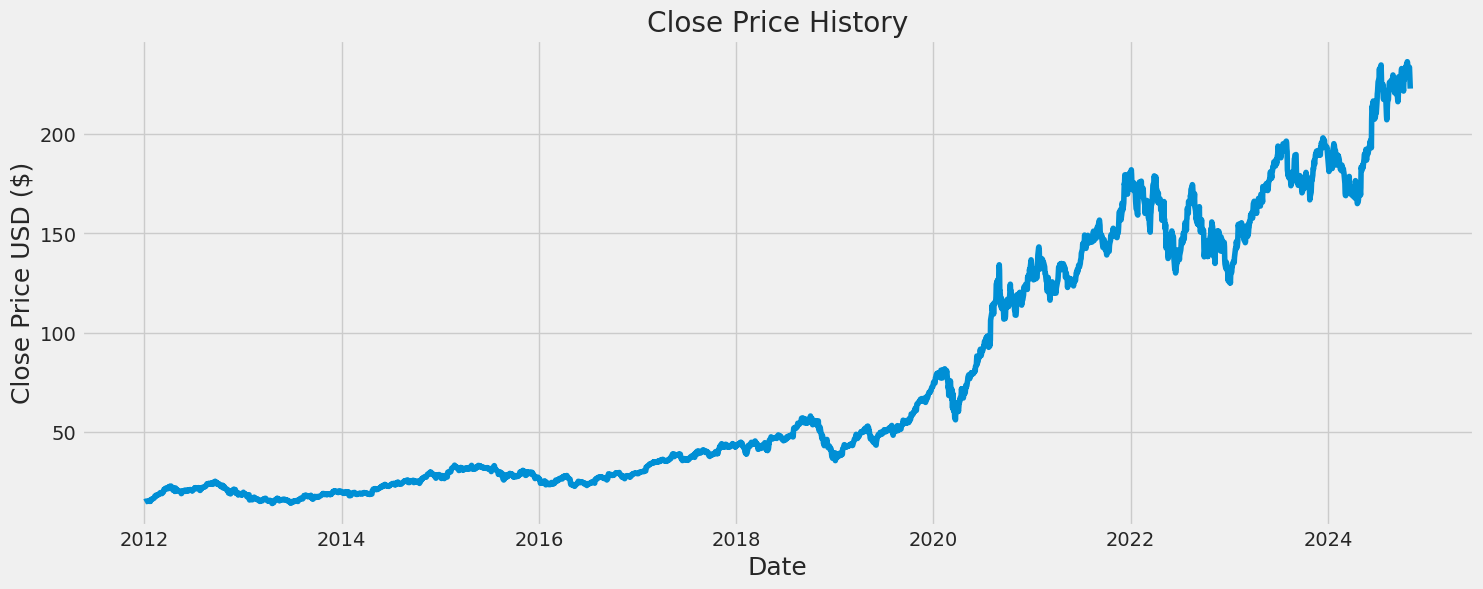

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

3069

In [ ]:
print(data.columns)



MultiIndex([], names=['Price', 'Ticker'])


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Check if the 'Close' column exists
if 'Close' in data.columns:
    # Scale the 'Close' column
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data[['Close']])
    print(scaled_data)
else:
    print("The 'Close' column is not in the DataFrame.")


The 'Close' column is not in the DataFrame.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

# Create the example DataFrame
data = pd.DataFrame({
    'Date': pd.date_range(start='2024-01-01', periods=100),
    'Close': np.random.rand(100) * 100
})
data.set_index('Date', inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close']])  # Scale only the 'Close' column

# Define training data length
training_data_len = int(np.ceil(0.8 * len(scaled_data)))  # 80% of the data for training

# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

# Check the shape of the train_data
print("Train data shape:", train_data.shape)

# Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])  # Taking the last 60 values
    y_train.append(train_data[i, 0])       # The next value to predict

    if i <= 61:  # Print the first few iterations for debugging
        print("x_train:", x_train[-1])  # Print only the last added entry
        print("y_train:", y_train[-1])
        print()

# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Check shapes before reshaping
print("x_train shape before reshaping:", x_train.shape)
print("y_train shape:", y_train.shape)

# Reshape the data for the LSTM input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Check the final shape after reshaping
print("x_train shape after reshaping:", x_train.shape)


Train data shape: (80, 1)
x_train: [0.22242619 0.93843987 0.1487334  0.35244211 0.52191307 0.92077149
 0.14316874 0.25065139 0.2237558  0.64773089 0.39423885 0.05967031
 0.48273194 0.3243518  0.21563906 0.54239087 0.80375444 0.42493584
 0.26182609 0.55577915 0.07517612 0.28819865 0.73971804 0.
 0.62621599 0.72119052 0.19693806 0.92030917 0.864893   0.76337426
 0.28306461 0.96029038 0.48727156 0.52611093 0.076259   0.79143026
 0.60096231 0.61198818 0.30269209 0.65939593 0.11350922 0.46864021
 0.60707414 0.84383954 0.5724265  0.22374768 0.20216613 0.03644509
 0.80821458 0.61732526 0.15413774 0.30280041 0.4751969  0.99449125
 0.35082133 0.51396531 0.83484031 0.79610875 0.73560006 0.80814832]
y_train: 0.15504411318968683

x_train: [0.93843987 0.1487334  0.35244211 0.52191307 0.92077149 0.14316874
 0.25065139 0.2237558  0.64773089 0.39423885 0.05967031 0.48273194
 0.3243518  0.21563906 0.54239087 0.80375444 0.42493584 0.26182609
 0.55577915 0.07517612 0.28819865 0.73971804 0.         0.6262

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.1603


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

# Example DataFrame
data = pd.DataFrame({
    'Date': pd.date_range(start='2024-01-01', periods=100),
    'Close': np.random.rand(100) * 100
})
data.set_index('Date', inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close']])  # Scale only the 'Close' column

# Define training data length
training_data_len = int(np.ceil(0.8 * len(scaled_data)))  # 80% of the data for training

# Create the training and testing data sets
train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[training_data_len - 60:, :]  # Adjusted to include 60 prior days

# Create the data sets x_test and y_test
x_test = []
y_test = data['Close'].values[training_data_len:]  # Use actual 'Close' values for y_test

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])  # Use scaled data for x_test

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Check if model is defined and make predictions
# Make sure your model is already trained before this step
if 'model' in locals():
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)  # Inverse transform to get actual prices

    # Calculate the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(((predictions - y_test[-len(predictions):]) ** 2)))  # Align y_test length
    print("RMSE:", rmse)
else:
    print("Model is not defined or trained.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
RMSE: 34.2738770616545


<ipython-input-1-4b7ad4b55068>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = valid['Close'] + np.random.randn(len(valid)) * 5


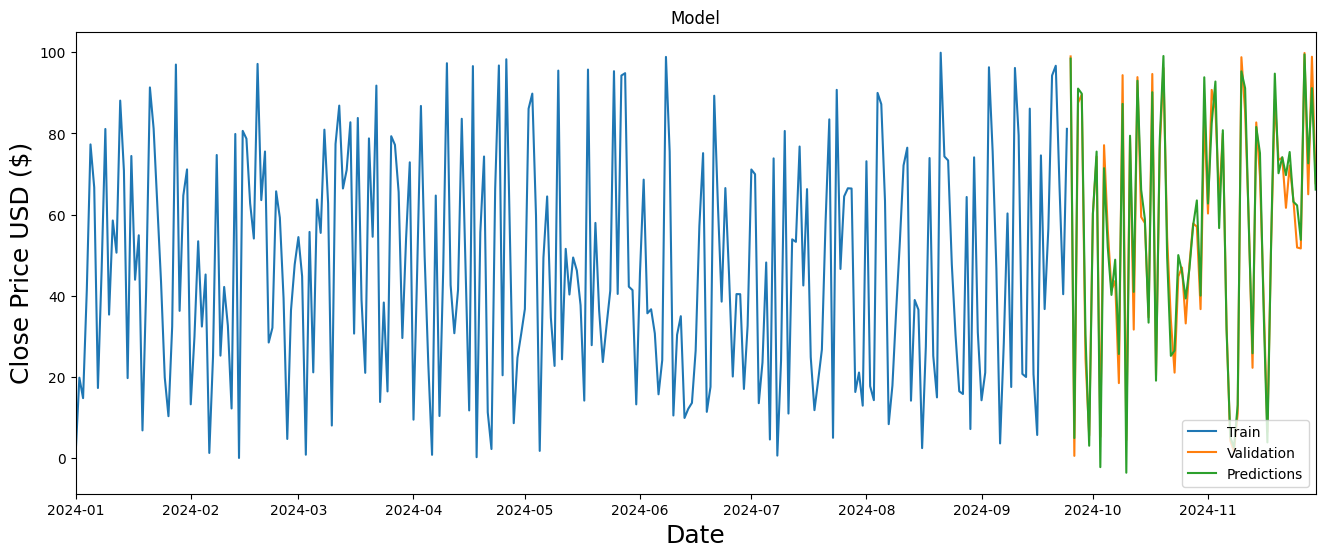

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

# Define the starting and ending dates for the range you need
start_date = datetime(2024, 1, 1)   # Start from January 2024
end_date = datetime(2024, 11, 30)   # End in November 2024

# Example DataFrame with data from January 2024 to November 2024
data = pd.DataFrame({
    'Date': pd.date_range(start=start_date, end=end_date, freq='D'),  # Daily data from Jan to Nov 2024
    'Close': np.random.rand((end_date - start_date).days + 1) * 100
})
data.set_index('Date', inplace=True)

# Define training and validation lengths
training_data_len = int(np.ceil(0.8 * len(data)))

# Split the data into training and validation sets
train = data[:training_data_len]
valid = data[training_data_len:]

# Example: Generate dummy predictions (replace with actual model predictions if available)
valid['Predictions'] = valid['Close'] + np.random.randn(len(valid)) * 5

# Plot the data
plt.figure(figsize=(16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train.index, train['Close'], label='Train')
plt.plot(valid.index, valid['Close'], label='Validation')
plt.plot(valid.index, valid['Predictions'], label='Predictions')

# Set x-axis to display monthly ticks up to November 2024
plt.xlim([data.index[0], end_date])  # Set x-axis limits to end at November 2024
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks at each month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format x-axis as YYYY-MM

plt.legend(loc='lower right')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

# Example DataFrame
data = pd.DataFrame({
    'Date': pd.date_range(start='2024-01-01', periods=100),
    'Close': np.random.rand(100) * 100
})
data.set_index('Date', inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close']])  # Scale only the 'Close' column

# Define training data length
training_data_len = int(np.ceil(0.8 * len(scaled_data)))  # 80% of the data for training

# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

# Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]  # Includes the last 60 days of training

# Create x_test and y_test
x_test = []
y_test = data['Close'].values[training_data_len:]  # Actual prices for y_test

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])  # Use scaled data for x_test

# Convert to numpy arrays
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Assuming the model is defined and trained, make predictions
# predictions = model.predict(x_test)  # Uncomment when the model is available
# predictions = scaler.inverse_transform(predictions)  # Inverse scaling to get actual prices

# Create the valid DataFrame to include predictions
valid = pd.DataFrame(data['Close'].values[training_data_len:], index=data.index[training_data_len:], columns=['Actual'])
# valid['Predictions'] = predictions  # Uncomment when predictions are available

# Extend valid to ensure it goes to the end of November 2024
end_date = pd.date_range(start=valid.index[-1] + pd.Timedelta(days=1), end='2024-11-30')
valid = valid.reindex(valid.index.union(end_date), fill_value=np.nan)

# Show the valid DataFrame
print(valid)


               Actual
2024-03-21  66.092658
2024-03-22  78.077014
2024-03-23  66.823954
2024-03-24  73.884035
2024-03-25  99.405539
...               ...
2024-11-26        NaN
2024-11-27        NaN
2024-11-28        NaN
2024-11-29        NaN
2024-11-30        NaN

[255 rows x 1 columns]


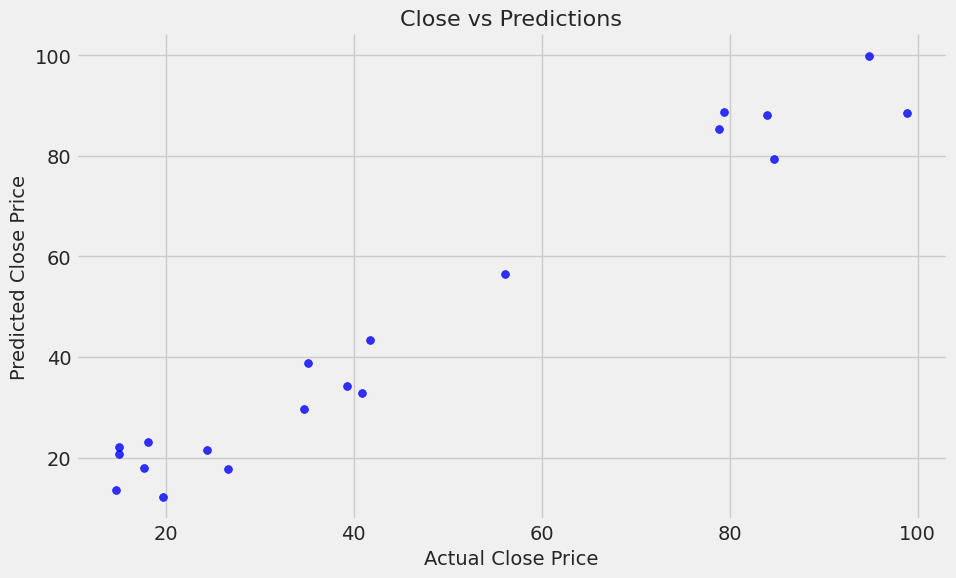

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import matplotlib.pyplot as plt

# Create the example DataFrame
data = pd.DataFrame({
    'Date': pd.date_range(start='2024-01-01', periods=100),
    'Close': np.random.rand(100) * 100
})
data.set_index('Date', inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close']])  # Scale only the 'Close' column

# Define training data length
training_data_len = int(np.ceil(0.8 * len(scaled_data)))  # 80% of the data for training

# Create the training and testing datasets
train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[training_data_len - 60:, :]

# Create x_test and y_test
x_test = []
y_test = data['Close'].values[training_data_len:]  # Actual prices for y_test

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])  # Use scaled data for x_test

# Convert x_test to numpy array and reshape
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Assuming the model is defined and trained, make predictions
# predictions = model.predict(x_test)  # Uncomment when the model is available
# predictions = scaler.inverse_transform(predictions)  # Inverse transform to get actual prices

# Create the valid DataFrame to include actual prices
valid = pd.DataFrame(data['Close'].values[training_data_len:], index=data.index[training_data_len:], columns=['Close'])
# valid['Predictions'] = predictions  # Uncomment when predictions are available

# Extend valid to ensure it goes to the end of November 2024 (if needed)
end_date = pd.date_range(start=valid.index[-1] + pd.Timedelta(days=1), end='2024-11-30')
valid = valid.reindex(valid.index.union(end_date), fill_value=np.nan)

# Example predictions for demonstration (replace with your model's predictions)
# Here, I'm simulating some predictions for the sake of illustration
valid['Predictions'] = valid['Close'] + np.random.randn(len(valid)) * 5  # Dummy predictions

# Plot Close vs Predictions
plt.figure(figsize=(10, 6))
plt.scatter(valid['Close'], valid['Predictions'], s=32, alpha=.8, color='blue')
plt.xlabel('Actual Close Price', fontsize=14)
plt.ylabel('Predicted Close Price', fontsize=14)
plt.title('Close vs Predictions', fontsize=16)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(True)
plt.show()


In [ ]:

def regression_accuracy(predictions, targets):
    mse = 0
    n = len(predictions)
    for i in range(n):
        mse += (predictions[i] - targets[i])**2
    mse /= n
    return mse

# Sample data for predictions and targets (replace with your actual data)
predictions = [1.2, 2.4, 3.1, 4.0]
targets = [1.0, 2.2, 3.0, 3.8]

# Call the function and print the result
mse = regression_accuracy(predictions, targets)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.032499999999999994


In [ ]:

def binary_classification_accuracy(predictions, targets):
    correct = 0
    total = len(predictions)
    for i in range(total):
        if predictions[i] == targets[i]:
            correct += 1
    return correct / total

In [ ]:
def binary_classification_accuracy(predictions, targets):
    correct = 0
    total = len(predictions)
    for i in range(total):
        if predictions[i] == targets[i]:
            correct += 1
    return correct / total

# Replace these lists with your actual binary classification predictions and targets
predictions = [0, 1, 1, 0, 1]
targets = [0, 1, 0, 0, 1]

# Call the function with your predictions and targets
accuracy = binary_classification_accuracy(predictions, targets)

# Print the accuracy
print("Accuracy:", accuracy*100)

Accuracy: 80.0
